In [22]:
from keras.layers import Dense, Dropout, Input, ReLU
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [13]:

x_train = (x_train.astype(np.float32) -127.5) / 127.5
print(x_train.shape)


(60000, 784)
(60000, 784)


(10000, 28, 28)


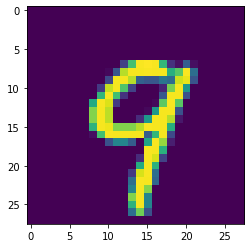

In [17]:
plt.imshow(x_test[12])
print(x_test.shape)

In [27]:
#creating generator
def create_generator():
    generator = Sequential()

    generator.add(Dense(units= 512, input_dim = 100))
    generator.add(ReLU())

    generator.add(Dense(units= 512))
    generator.add(ReLU())

    generator.add(Dense(units= 1024))
    generator.add(ReLU())


    generator.add(Dense(units= 784, activation = "tanh"))

    generator.compile(loss = "binary_crossentropy",
                    optimizer = Adam(learning_rate=0.0001, beta_1=0.5))

    return generator

In [28]:
g = create_generator()
g.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               51712     
_________________________________________________________________
re_lu_3 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
re_lu_4 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              525312    
_________________________________________________________________
re_lu_5 (ReLU)               (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 784)              

In [30]:
def create_discriminator():
    discriminator = Sequential()

    discriminator.add(Dense(units=1024, input_dim = 784))
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.4))

    discriminator.add(Dense(units=512))
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.4))

    discriminator.add(Dense(units=256))
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.4))

    discriminator.add(Dense(units=1, activation="sigmoid"))

    discriminator.compile(loss = "binary_crossentropy", optimizer= Adam(learning_rate=0.0001, beta_1=0.5))

    return discriminator

In [31]:
d = create_discriminator()
d.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1024)              803840    
_________________________________________________________________
re_lu_6 (ReLU)               (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
re_lu_7 (ReLU)               (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)              

In [32]:
def create_gan(discriminator, generator):
    discriminator.trainable = False
    gan_input = Input(shape=(100, ))

    x = generator(gan_input)
    gan_output = discriminator(x)

    gan = Model(inputs = gan_input, outputs = gan_output)

    gan.compile(loss="binary_crossentropy", optimizer="adam")

    return gan

In [34]:
gan = create_gan(d, g)
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 784)               1643280   
_________________________________________________________________
sequential_4 (Sequential)    (None, 1)                 1460225   
Total params: 3,103,505
Trainable params: 1,643,280
Non-trainable params: 1,460,225
_________________________________________________________________


In [45]:
#training

epochs = 50
batch_size = 256

for epoch in range(epochs):
    
    for _ in range(batch_size):


        noise = np.random.normal(0,1, [batch_size, 100])

        generated_images = g.predict(noise)

        image_batch = x_train[np.random.randint(low = 0, high = x_train.shape[0], size = batch_size)]
        

        x = np.concatenate([image_batch, generated_images])

        y_dis = np.zeros(batch_size * 2)
        y_dis[:batch_size] = 1

        d.trainable = True
        d.train_on_batch(x, y_dis)

        noise = np.random.normal(0, 1, [batch_size, 100])

        y_gen = np.ones(batch_size)

        d.trainable = False

        gan.train_on_batch(noise, y_gen)
    print("epochs: ", epoch)


epochs:  0
epochs:  1
epochs:  2
epochs:  3
epochs:  4
epochs:  5
epochs:  6
epochs:  7
epochs:  8
epochs:  9
epochs:  10
epochs:  11
epochs:  12
epochs:  13
epochs:  14
epochs:  15
epochs:  16
epochs:  17
epochs:  18
epochs:  19
epochs:  20
epochs:  21
epochs:  22
epochs:  23
epochs:  24
epochs:  25
epochs:  26
epochs:  27
epochs:  28
epochs:  29
epochs:  30
epochs:  31
epochs:  32
epochs:  33
epochs:  34
epochs:  35
epochs:  36
epochs:  37
epochs:  38
epochs:  39
epochs:  40
epochs:  41
epochs:  42
epochs:  43
epochs:  44
epochs:  45
epochs:  46
epochs:  47
epochs:  48
epochs:  49


In [46]:
g.save_weights("gans_model.h5")

In [79]:
noise = np.random.normal(loc=0, scale=1, size = [100, 100])
generated_images = g.predict(noise)
generated_images = generated_images.reshape(100, 28, 28)

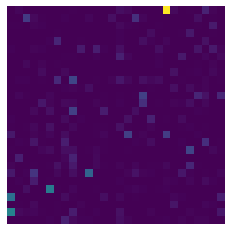

In [85]:
plt.imshow(generated_images[47])
plt.axis("off")
plt.show()